# Data Analytics in Action Assignment: Part-A

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

DF=pd.read_excel('EconomicIndicators2020.xlsx')
DF.head()

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,62.58,516.87,1546.26,5402.59,8709.47,80.29,38.97
1,2,Albania,Europe,76.99,5343.04,933.42,2915.07,4383.20,NaN,2.84
2,3,Algeria,Africa,74.45,3354.16,27257.32,20089.32,161563.00,214.85,43.45
3,4,Angola,Africa,62.26,1502.95,3548.57,4997.28,19814.50,50.74,33.43
4,5,Antigua and Barbuda,North America,78.84,15284.77,29.88,30.34,474.60,830.34,0.09


In [4]:
#Checking which all column have missing/null values

print(DF.isnull().sum())

No             0
Country        0
Continent      0
LifeExpect     0
GDPPC          0
MfgMn$         0
AgriMn$        0
CO2kt         10
HealthPC$     13
Pop_mn         0
dtype: int64


In [5]:
# Impute missing values with mean of the column

DF['CO2kt'].fillna(DF['CO2kt'].mean(), inplace=True)
DF['HealthPC$'].fillna(DF['HealthPC$'].mean(), inplace=True)

In [6]:
#Checking to see if any columns contain null/missing values after data cleaning

print(DF.isnull().sum())

No            0
Country       0
Continent     0
LifeExpect    0
GDPPC         0
MfgMn$        0
AgriMn$       0
CO2kt         0
HealthPC$     0
Pop_mn        0
dtype: int64


In [7]:
DF.describe()

,No,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
count,177.000000,177.000000,177.000000,1.770000e+02,1.770000e+02,1.770000e+02,177.000000,177.000000
mean,89.000000,72.670395,16590.260056,7.354169e+04,2.007267e+04,1.882131e+05,1228.635427,42.125932
std,51.239633,7.361974,24174.474210,3.483750e+05,9.458137e+04,9.061550e+05,1930.889219,154.097014
min,1.000000,52.780000,435.470000,2.020000e+00,0.000000e+00,5.690000e+01,17.950000,0.040000
25%,45.000000,67.990000,2446.080000,1.030400e+03,4.891900e+02,4.150700e+03,132.960000,1.790000
50%,89.000000,73.650000,5965.450000,3.819320e+03,2.954240e+03,1.837530e+04,426.660000,8.440000
75%,133.000000,78.080000,20398.060000,2.752534e+04,1.017377e+04,1.119781e+05,1228.635427,29.350000
max,177.000000,85.500000,165284.500000,3.860698e+06,1.130757e+06,1.094469e+07,11702.410000,1411.100000


In [19]:
# DF.to_csv('Corrected_CSV', index=False) To check if the imputed values appear in the csv file

# Question1:

1a) What is the average life expectancy across all countries? 

In [11]:
avg_life_exp = DF['LifeExpect'].mean()
print(f"The average life expectancy across all countries is: {avg_life_exp:.2f} years.")


The average life expectancy across all countries is: 72.67 years.


1b) How does life expectancy vary across the continents? Which continent has the biggest variation? Explain using appropriate charts or metrics.

               count       mean       std    min      25%     50%     75%  \
Continent                                                                   
Africa          44.0  63.968636  6.033285  52.78  60.0075  62.685  66.590   
Asia            45.0  74.774222  5.555416  62.58  70.4200  74.800  78.950   
Europe          43.0  78.630698  3.890038  70.17  75.7500  80.530  82.035   
North America   25.0  74.066000  3.639282  64.05  71.8000  73.420  76.980   
Oceania         10.0  71.599000  6.348316  64.98  67.4325  70.435  72.310   
South America   10.0  73.444000  4.409936  64.47  72.4075  73.840  75.610   

                 max  
Continent             
Africa         77.24  
Asia           85.50  
Europe         83.21  
North America  81.14  
Oceania        83.20  
South America  79.38  


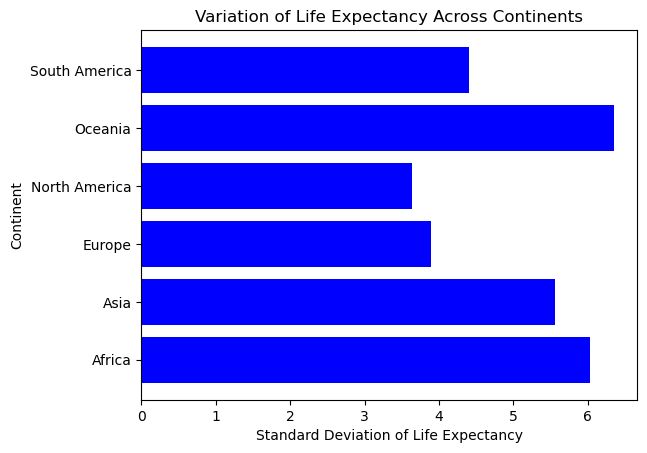

In [12]:
#To calculate the standard deviation values accross all continents

print(DF.groupby('Continent')['LifeExpect'].describe())
stddev = DF.groupby('Continent')['LifeExpect'].std().reset_index()


# Plotting the bar graph
plt.barh(stddev['Continent'], stddev['LifeExpect'], color='blue')
plt.title('Variation of Life Expectancy Across Continents')
plt.xlabel('Standard Deviation of Life Expectancy')
plt.ylabel('Continent')
plt.show()

# Displaying the plot
plt.show()

1c) Is the distribution of life expectancy approximately symmetric? Explain why or why not using appropriate charts and analysis.

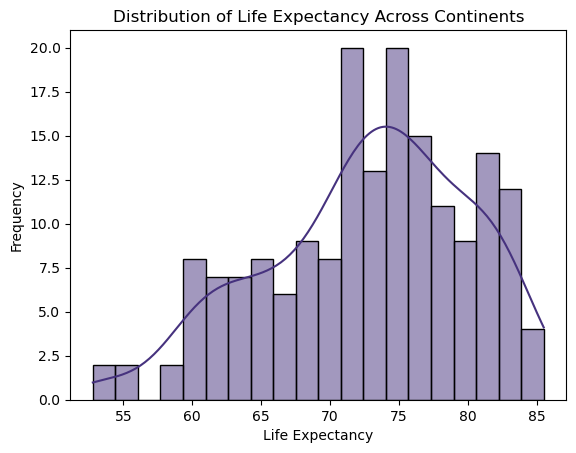

Skewness: -0.50
Kurtosis: -0.36


In [14]:
# Plot histogram

sns.set_palette('viridis')
sns.histplot(DF,x='LifeExpect',bins=20,kde=True)
plt.title('Distribution of Life Expectancy Across Continents')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

life_expectancy=DF['LifeExpect']

# Calculate skewness and kurtosis

skewness = life_expectancy.skew()
kurtosis = life_expectancy.kurtosis()

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")




# Question 2:

### Hypothesis Testing:

In [15]:
#Fetching the sample data

life_expectancy = DF['LifeExpect']

# Setting the expected average life expectancy

expected_life_expectancy=70

# Perform one-sample t-test

t_stat, p_value = stats.ttest_1samp(life_expectancy, expected_life_expectancy)


# Printing of Results
print("One-Sample T-Test Results:")
print(f"Null hypothesis: Expected average life expectancy = {expected_life_expectancy} years")
print(f"Sample mean life expectancy: {life_expectancy.mean()}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Significance at 99% confidence level

alpha = 0.01
print(f"\nSignificance level (alpha): {alpha}")

# Checking for significance at 99% confidence level

alpha = 0.01
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("The available evidence strongly indicates that the average life expectancy differs from 70 years.")
else:
    print("\nFail to reject the null hypothesis.")
    print("Insufficient evidence exists to indicate a difference in average life expectancy.")




One-Sample T-Test Results:
Null hypothesis: Expected average life expectancy = 70 years
Sample mean life expectancy: 72.67039548022599
T-statistic: 4.825784830727795
P-value: 3.0106331354163777e-06

Significance level (alpha): 0.01

Reject the null hypothesis.
The available evidence strongly indicates that the average life expectancy differs from 70 years.


# Question 3:

3a) Your instinct tells you that there has to be a relationship between Life expectancy at birth and the GDP per capita of countries. Create an appropriate chart between the variables to get an initial idea of the relationship.

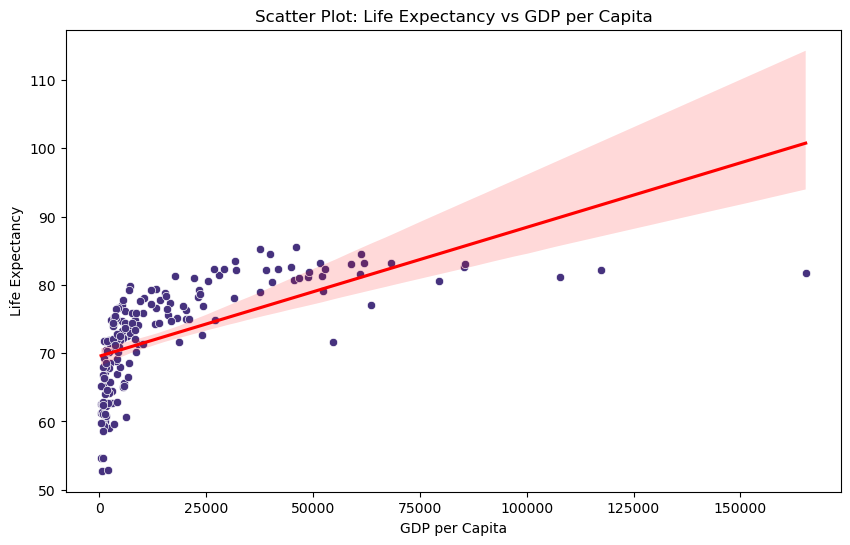

In [20]:
#Setting the depenmdent and independant variables 

life_expectancy = DF['LifeExpect']  #Dependant Variable
gdp_per_capita = DF['GDPPC']        #Independant Variable

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdp_per_capita, y=life_expectancy)
# Adding a trend line
sns.regplot(x='GDPPC', y='LifeExpect', data=DF, scatter=False, color='red')

plt.title('Scatter Plot: Life Expectancy vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()


In [21]:
#Correlation Matrix to check relation between varaibles

cor_mat = DF[['GDPPC', 'LifeExpect','CO2kt']].corr()
print(cor_mat)



               GDPPC  LifeExpect     CO2kt
GDPPC       1.000000    0.619943  0.049778
LifeExpect  0.619943    1.000000  0.108235
CO2kt       0.049778    0.108235  1.000000


In [22]:
#Covariation Matrix
cov_mat = DF[['GDPPC', 'LifeExpect','CO2kt']].cov()
print(cov_mat)

                   GDPPC     LifeExpect         CO2kt
GDPPC       5.844052e+08  110332.385664  1.090427e+09
LifeExpect  1.103324e+05      54.198657  7.220449e+05
CO2kt       1.090427e+09  722044.871363  8.211168e+11


3b) Build a simple linear regression model between the above-mentioned variables. What does the result tell you? Interpret the regression coefficient and interpret the outputs of the analysis in simple terms that the client can understand.

In [23]:
X = DF['GDPPC'] #Independant Variable
Y = DF['LifeExpect'] #Dependant Variable

# Adding a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(Y, X).fit()

# Printing the summary of the regression model
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:             LifeExpect   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.56e-20
Time:                        02:48:21   Log-Likelihood:                -561.07
No. Observations:                 177   AIC:                             1126.
Df Residuals:                     175   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5382      0.529    131.555      0.0

# Question 4: Multiple Regression

Build a suitable multiple regression model based on the given variables. Comment on the output of the multiple regression and interpret the results(specifically standard error of estimate, R-squared, and adjusted Rsquared). Interpret each of the regression coefficients. Comment on the accuracy of the model’s prediction.

In [24]:
xvar_list = ['GDPPC', 'MfgMn$', 'AgriMn$', 'CO2kt', 'HealthPC$', 'Pop_mn']  #Independant Variables
yvar = 'LifeExpect'   #Dependant Variable
data = DF.reset_index(drop=True)

X = data[xvar_list]
Y = data[[yvar]]
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             LifeExpect   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     23.13
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           7.23e-20
Time:                        02:50:50   Log-Likelihood:                -551.18
No. Observations:                 177   AIC:                             1116.
Df Residuals:                     170   BIC:                             1139.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1624      0.540    128.130      0.0